# Introducción al dataset

* Resumen de Datos: Calcular estadísticas descriptivas básicas como la media, la mediana, la desviación estándar, el mínimo, el máximo, etc.

* Visualización de Datos: Crear gráficos y visualizaciones para representar la distribución de datos, relaciones entre variables y cualquier patrón evidente. Esto puede incluir histogramas, diagramas de dispersión, gráficos de caja, etc.


## Exploración del dataset

In [ ]:
!pip install geotext
!pip install emoji
!pip install geopandas
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import geopandas
import geopy
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

import numpy as np
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')
sns.set_style("white")
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(12,10))
plt.rcParams['font.family'] = 'serif'

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sns.set_style("white")
plt.rc('figure',figsize=(12,10))
plt.rcParams['font.family'] = 'serif'

In [ ]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/TFM

Mounted at /content/drive
/content/drive/MyDrive/TFM


In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el archivo csv en un DataFrame
df = pd.read_csv("vaccination_all_tweets.csv")

In [ ]:
# Mostramos el tamaño del df
print("Tamaño df:\n", df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", df.columns)

# Visualizamos las 3 primeras filas con el comando head()
df.head(3)

Tamaño df:
 (228207, 16)
Columnas del df:
 Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [ ]:
# Obtener el tipo de dato de cada columna
df_types = df.dtypes

# Mostrar el tipo de dato de cada columna
print("Tipos de datos por columna:")
print(df_types)

Tipos de datos por columna:
id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object


## Limpieza del dataset

### Duplicados

Comprobamos que no hay filas duplicadas, en caso de ser así estas se eliminan.

In [ ]:
#Miramos si hay duplicados
num_duplicados= df.duplicated().sum()
print(f'Hay {num_duplicados} filas duplicadas')
#Eliminamos las filas duplicadas
df= df.drop_duplicates()

Hay 0 filas duplicadas


In [ ]:
# Eliminar filas con todas las columnas vacías
df = df.dropna(how='all')

### Valores faltantes

In [ ]:
#datos nulos/missings
df.isna().sum()

id                      0
user_name               2
user_location       66911
user_description    17023
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
#Cuales son los user_name con valor nulo
df[df["user_name"].isna()]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
148331,1421575394071699457,NaN,NaN,@Aidan39701417's account is temporarily unavai...,2021-07-22 23:18:34,37,44,603,False,2021-07-31 20:56:00,@Aidan39701417's account is temporarily unavai...,NaN,Twitter Web App,0,1,False
222427,1459945750817771520,NaN,NaN,@depopulate_gov's account is temporarily unava...,2021-11-11 20:51:35,0,0,0,False,2021-11-14 18:06:06,@depopulate_gov's account is temporarily unava...,NaN,Twitter Web App,0,0,False


Estas dos cuentas no se encuentran disponibles temporalmente, y tampoco hay un mensaje que aporte información sobre la vacuna del covid, debido a que el propio tweet es el que indica que las cuentas están desactivadas.

Como no aporta ninguna información al estudio, eliminamos estas dos filas.

In [ ]:
df = df.drop(df[df["user_name"].isna()].index)

## Gestión del tipo de variables

La gestión del tipo de variables en el análisis exploratorio de datos es esencial para realizar análisis estadísticos y visuales significativos.

Las variables pueden clasificarse en diferentes tipos y, según el tipo, se deben tratar y interpretar de manera diferente. En el caso de este dataset nos encontramos con variables como:

1. **Variables Numéricas:**
   - id, user_followers, user_friends, user_favourites, retweets, favorites

   *Como tratarlas:*
   - Uso de estadísticas descriptivas (media, mediana, desviación estándar).
   - Visualización mediante histogramas, gráficos de dispersión y boxplots.


2. **Variables Temporales:**
   - user_created, date

   *Como tratarlas:*
   - Uso de gráficos de series temporales.
   - Análisis de tendencias y estacionalidad.

3. **Variables Textuales:**
   - user_name, user_location, user_description, text, hashtags, source

   *Como tratarlas:*
   - Análisis de frecuencia de palabras.
   - Procesamiento de lenguaje natural (NLP) para análisis más avanzados.

4. **Variables Booleanas:**
   - user_verified, is_retweeted
   
   *Como tratarlas:*
   - Análisis de proporciones y porcentajes.
   - Uso de gráficos de barras o diagramas circulares (pie chart).


### Variables numéricas

In [ ]:
import pandas as pd

# estadísticas de retweets y favoritos
retweets_stats = df['retweets'].describe()
favorites_stats = df['favorites'].describe()

# dataframe estadísticas
stats_df = pd.DataFrame({
    'Retweets': retweets_stats,
    'Favorites': favorites_stats
})

stats_df = stats_df.transpose()
stats_df

,count,mean,std,min,25%,50%,75%,max
Retweets,228205.0,2.489306,51.080045,0.0,0.0,0.0,1.0,12294.0
Favorites,228205.0,10.819110,199.528565,0.0,0.0,0.0,2.0,54017.0


In [ ]:
# Identificar los tweets con el mayor número de retweets y favoritos
top_retweets = df.sort_values(by='retweets', ascending=False).head(5)
top_favorites = df.sort_values(by='favorites', ascending=False).head(5)

# Extraer información relevante de estos tweets
top_retweets_info = top_retweets[['text', 'retweets', 'user_name', 'date']]
top_favorites_info = top_favorites[['text', 'favorites', 'user_name', 'date']]

top_retweets_info, top_favorites_info

(                                                     text  retweets  \
 221427  This video fits the last almost 2 years into 2...     12294   
 68358   RDIF, Laboratorios Richmond launched productio...     11288   
 46053   Why we need Two Doses of mRNA Vaccine 💉 #vacci...      7695   
 54674   We completely reject the false and malicious r...      6018   
 66822   ICMR study shows #COVAXIN neutralises against ...      4851   
 
              user_name                 date  
 221427       Sputnik V  2021-11-11 14:08:00  
 68358        Sputnik V  2021-04-20 15:30:23  
 46053   hotvickkrishna  2021-04-01 21:17:51  
 54674    BharatBiotech  2021-04-08 15:17:19  
 66822             ICMR  2021-04-21 06:54:05  ,
                                                      text  favorites  \
 221427  This video fits the last almost 2 years into 2...      54017   
 68358   RDIF, Laboratorios Richmond launched productio...      25724   
 17118   Got my jab. For the curious, it was #Covaxin. ...      

<ipython-input-15-24b7f9ff5015>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



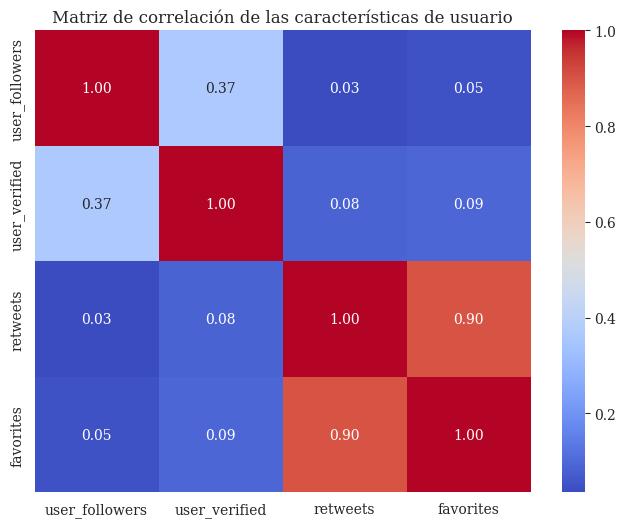

,retweets,favorites
day_of_week,,
0,2.863233,13.016632
1,2.720109,11.677207
2,2.766753,12.135463
3,2.865743,11.464570
4,1.863397,8.534987
5,1.816685,8.507684
6,2.209940,8.931481


In [ ]:
import seaborn as sns

user_engagement_df = df[['user_followers', 'user_verified', 'retweets', 'favorites']]

user_engagement_df['user_verified'] = user_engagement_df['user_verified'].astype(int)

# Calcular correlaciones
correlation_matrix = user_engagement_df.corr()

# @title Matriz de correlación de las características de usuario
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las características de usuario')
plt.show()

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek

# Agrupar por dia de la semana
avg_engagement_by_day = df.groupby('day_of_week')[['retweets', 'favorites']].mean()

avg_engagement_by_day

* Valor elevado de correlación entre retweet y favoritos
* Correlación entre si el usuario esta verificado y el numero de seguidores

- Dia de la semana con más retweets y favoritos: Lunes
- Dia de la semana con menos: Sábado

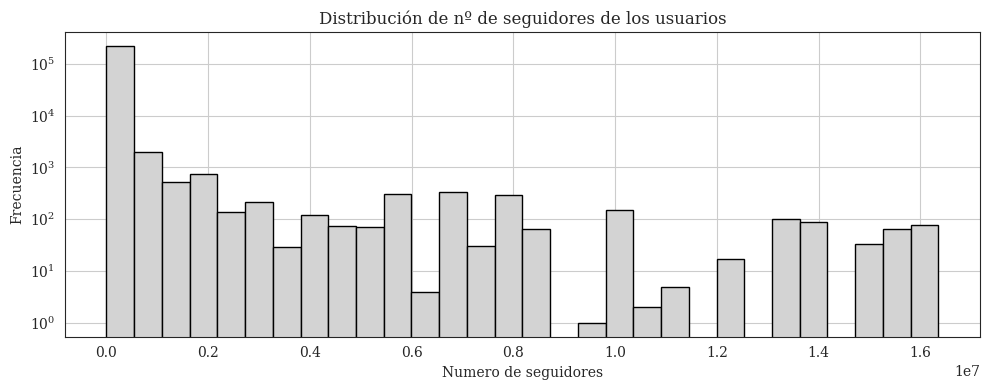

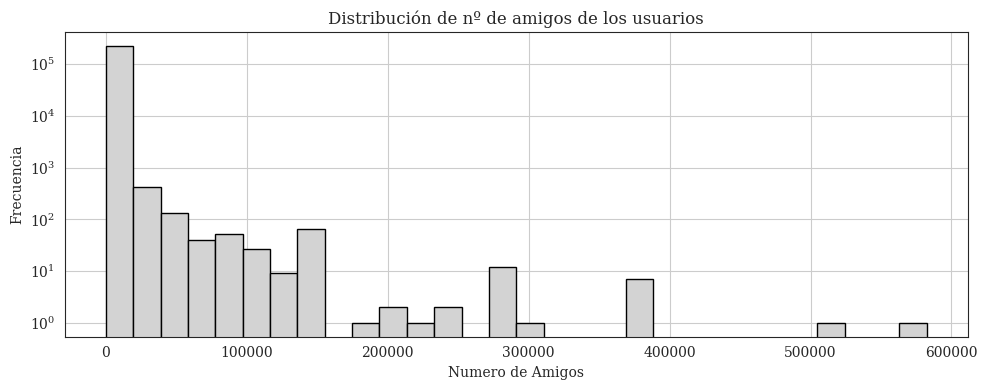

In [ ]:
# @title Histogramas para 'user_followers' y 'user_friends'
plt.figure(figsize=(10, 4))
plt.hist(df['user_followers'], bins=30, color='lightgrey', edgecolor='black')
plt.title('Distribución de nº de seguidores de los usuarios')
plt.xlabel('Numero de seguidores')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(df['user_friends'], bins=30, color='lightgrey', edgecolor='black')
plt.title('Distribución de nº de amigos de los usuarios')
plt.xlabel('Numero de Amigos')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()

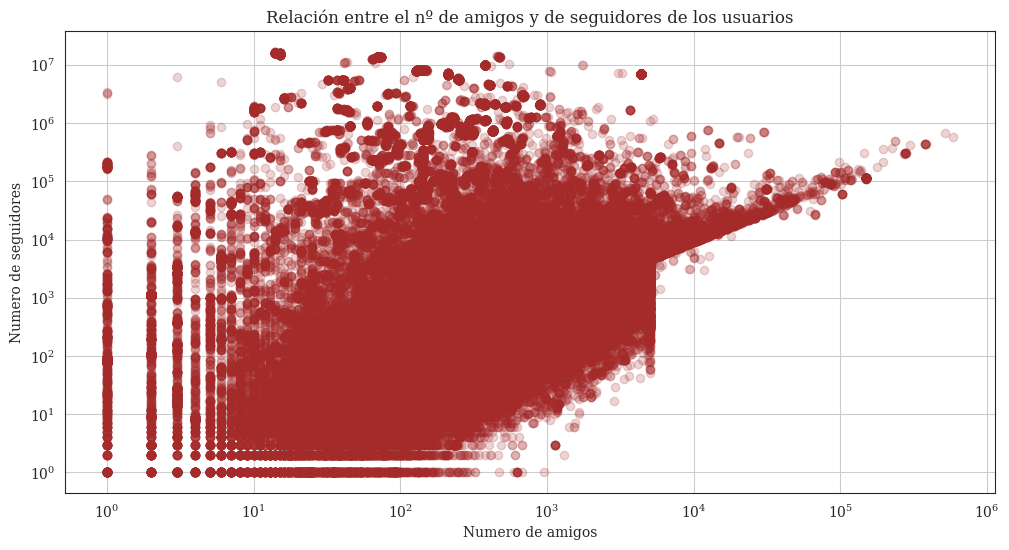

In [ ]:
# @title Scatter Plot para explorar la relación entre seguidores y amigos
plt.figure(figsize=(12, 6))
plt.scatter(df['user_friends'], df['user_followers'], alpha=0.2, color='brown')
plt.title('Relación entre el nº de amigos y de seguidores de los usuarios')
plt.xlabel('Numero de amigos')
plt.ylabel('Numero de seguidores')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

### Tratamiento de 'id'
La variable 'id' es de tipo numérico, para que no genere ningún tipo de problema más adelante se cambia a object.

In [ ]:
df['id']= df['id'].astype(object);

### Variables temporales

In [ ]:
# Correción de los datos temporales, que corresponden a las columnas 'user_created' y 'date'
from datetime import datetime

# Vamos a aplicar el cambio a todos los elementos de la columna con una list comprehension
# Y guardamos los elementos en formato fecha en una nueva columna
df['user_created'] = pd.to_datetime(df['user_created'])
df['date'] = pd.to_datetime(df['date'])

#creamos una nueva columna con el numero del mes de la fecha de publicación del tweet
df['mes'] = df['date'].dt.month
df['dia'] = df['date'].dt.day
df['año'] = df['date'].dt.year

# Verificar si hay datos nulos en 'user_created' y 'date'
print("Valores nulos en 'user_created':", df['user_created'].isnull().sum())
print("Valores nulos en 'date':", df['date'].isnull().sum())

# Imprimir algunas filas del DataFrame para verificar los resultados
print(df[['id', 'date','dia','mes','año']])

Valores nulos en 'user_created': 0
Valores nulos en 'date': 0
                         id                date  dia  mes   año
0       1340539111971516416 2020-12-20 06:06:44   20   12  2020
1       1338158543359250433 2020-12-13 16:27:13   13   12  2020
2       1337858199140118533 2020-12-12 20:33:45   12   12  2020
3       1337855739918835717 2020-12-12 20:23:59   12   12  2020
4       1337854064604966912 2020-12-12 20:17:19   12   12  2020
...                     ...                 ...  ...  ...   ...
228202  1460170772299665408 2021-11-15 09:00:15   15   11  2021
228203  1460163268262051841 2021-11-15 08:30:26   15   11  2021
228204  1460163224221851655 2021-11-15 08:30:15   15   11  2021
228205  1460156376995573765 2021-11-15 08:03:03   15   11  2021
228206  1460155671140134912 2021-11-15 08:00:15   15   11  2021

[228205 rows x 5 columns]


In [ ]:
min_date= min(df['date'])
print('Fecha del primer tweet:', min_date)

max_date= max(df['date'])
print('Fecha del último tweet:',max_date)

Fecha del primer tweet: 2020-12-12 11:55:28
Fecha del último tweet: 2021-11-23 20:58:08


In [ ]:
min_user_created= min(df['user_created'])
print('Fecha de creación del primer usuario:', min_user_created)

max_user_created= max(df['user_created'])
print('Fecha de creación del último usuario:',max_user_created)

Fecha de creación del primer usuario: 2006-07-15 21:06:00
Fecha de creación del último usuario: 2021-11-22 23:11:26


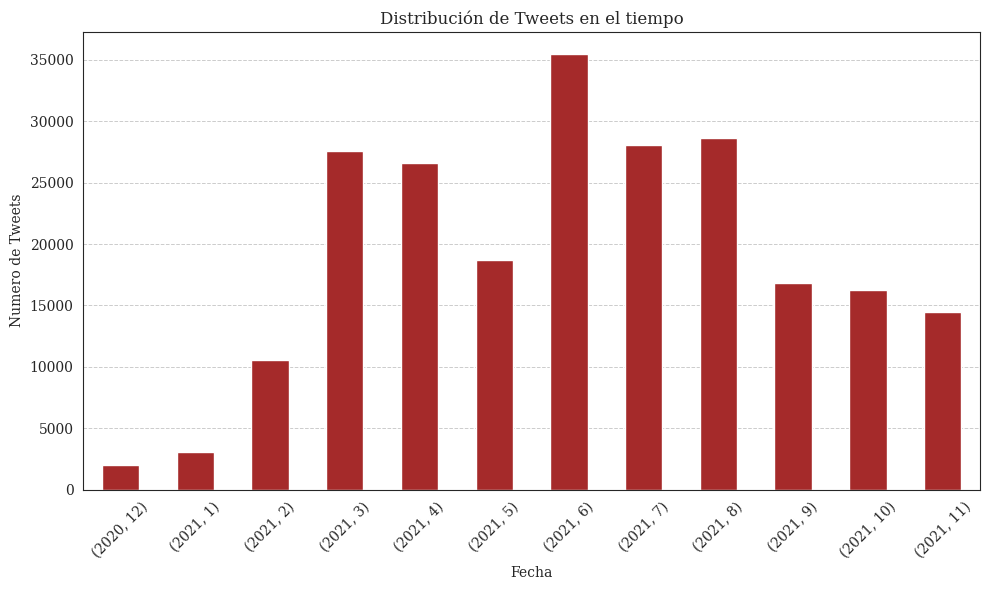

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por año y numero de tweets
tweets_per_year = df.groupby(['año','mes'])['id'].count()

# @title Diagrama de barras: conteo de tweets por mes
plt.figure(figsize=(10, 6))
tweets_per_year.plot(kind='bar', color='brown')
plt.title('Distribución de Tweets en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Numero de Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

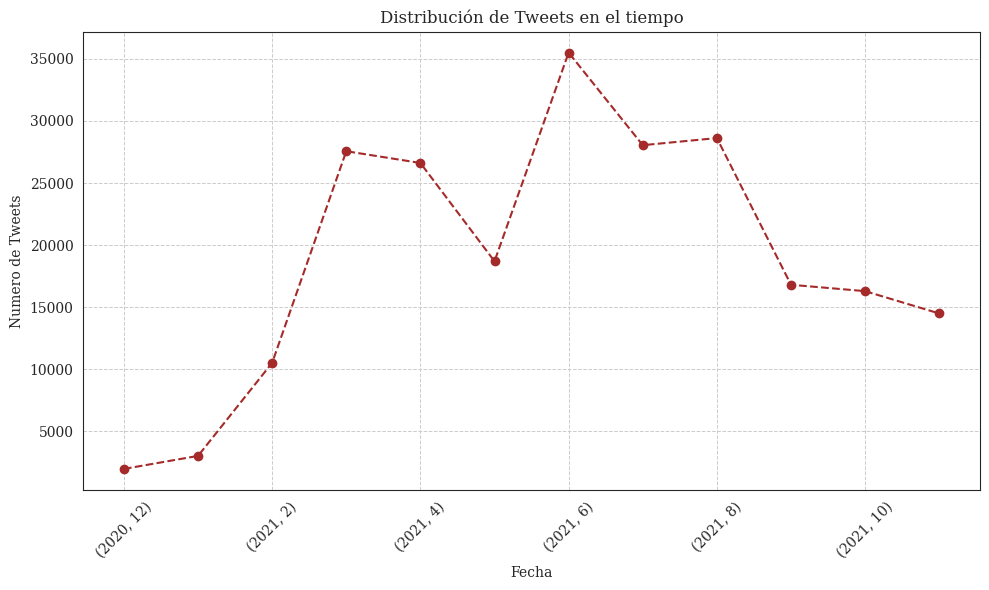

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por año y numero de tweets
tweets_per_year = df.groupby(['año','mes'])['id'].count()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
tweets_per_year.plot(color='brown', marker='o', linestyle='--')
plt.title('Distribución de Tweets en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Numero de Tweets')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


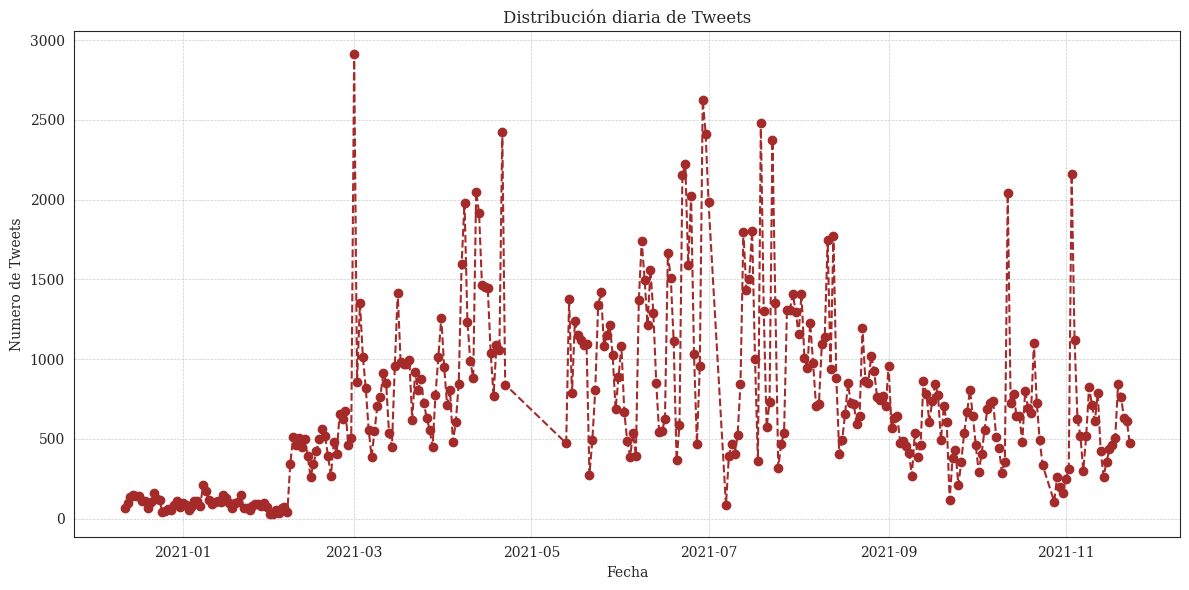

In [ ]:
df['date_only'] = df['date'].dt.date # Fecha sin horas
tweets_per_day_analysis = df['date_only'].value_counts().sort_index()

# @title Distribución de tweets a lo largo del tiempo
plt.figure(figsize=(12, 6))
tweets_per_day_analysis.plot(kind='line', marker='o', linestyle='--', color='brown')
plt.title('Distribución diaria de Tweets')
plt.xlabel('Fecha')
plt.ylabel('Numero de Tweets')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

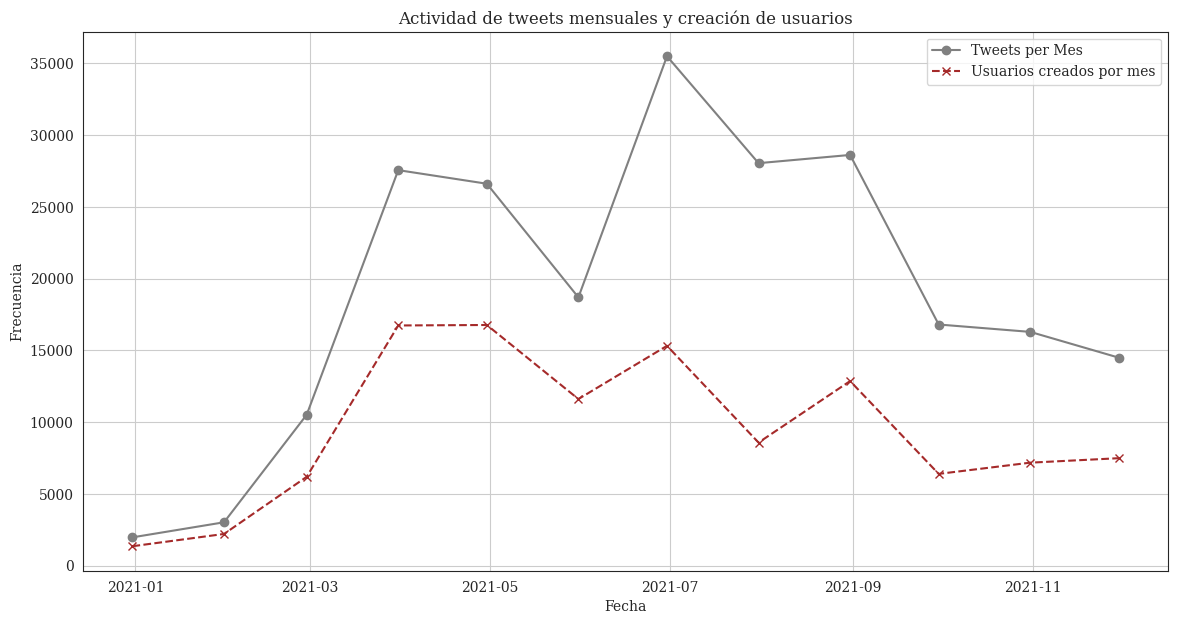

In [ ]:
df_time_series = df.set_index('date')

monthly_tweets = df_time_series['text'].resample('M').count()
monthly_user_creation = df_time_series['user_created'].resample('M').nunique()

# @title Gráfico
plt.figure(figsize=(14, 7))

plt.plot(monthly_tweets.index, monthly_tweets, label='Tweets per Mes', marker='o', linestyle='-',color='gray')
plt.plot(monthly_user_creation.index, monthly_user_creation, label='Usuarios creados por mes', marker='x', linestyle='--',color='brown')

plt.title('Actividad de tweets mensuales y creación de usuarios')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)

plt.show()


### Variables booleanas

In [ ]:
# Comprobación de variables booleanas
print('Los valores únicos de user_verified son: ', df['user_verified'].unique())

Los valores únicos de user_verified son:  [False  True]


In [ ]:
verificados_true = df[df['user_verified'] == True]
print('Los registros con user_verified = True son:')
print(verificados_true['user_name'])

Los registros con user_verified = True son:
3               Charles Adler
7         Dr.Krutika Kuppalli
12                       WION
13        Dr.Krutika Kuppalli
15                  City A.M.
                 ...         
228107              Sputnik V
228135      FRANCE 24 English
228153              Sputnik V
228187     The Jerusalem Post
228189        i24NEWS English
Name: user_name, Length: 19202, dtype: object


In [ ]:
print('Los registros con user_verified = True son:', len(verificados_true))

Los registros con user_verified = True son: 19202


In [ ]:
print('Los valores únicos de is_retweet son: ', df['is_retweet'].unique())

Los valores únicos de is_retweet son:  [False]


Ninguno de los tweets que tenemos en el dataset proviene de otra persona (ha sido retweeteado).

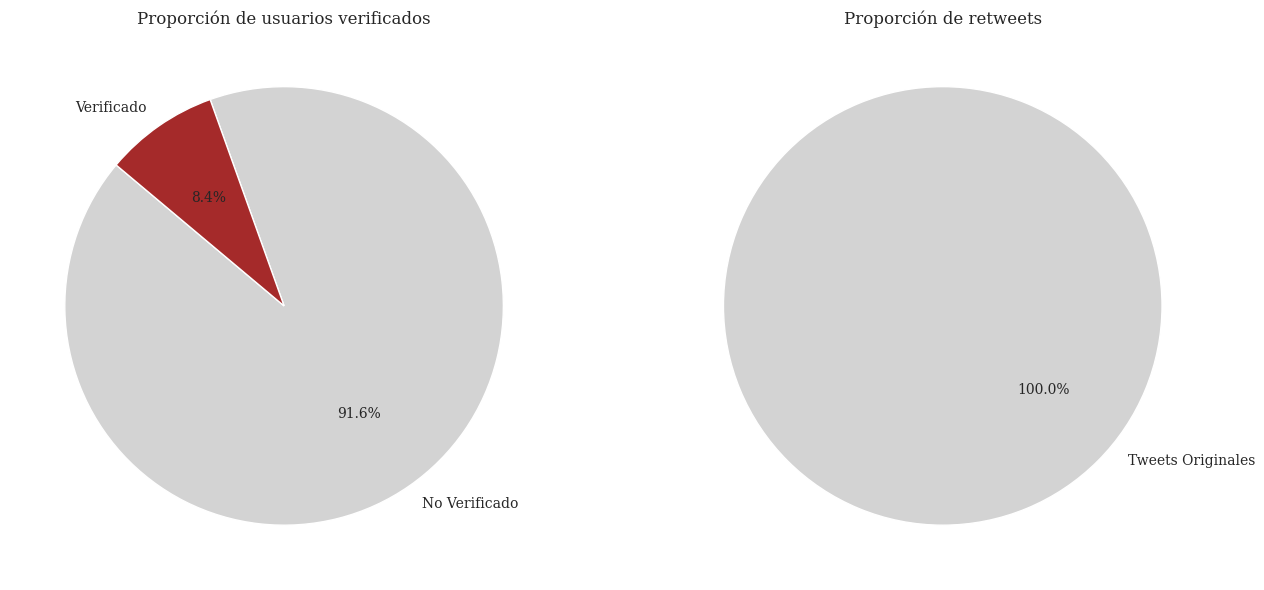

In [ ]:
# Calcular la proporción de usuarios verificados
verified_counts = df['user_verified'].value_counts(normalize=True) * 100

# Calcular la proporcion de tweets que son retweets (no son originales)
retweet_counts = df['is_retweet'].value_counts(normalize=True) * 100

# @title Proporción de usuarios verificados y de retweets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(verified_counts, labels=verified_counts.index.map({True: 'Verificado', False: 'No Verificado'}), autopct='%1.1f%%', startangle=140, colors=['lightgrey', 'brown'])
axes[0].set_title('Proporción de usuarios verificados')

axes[1].pie(retweet_counts, labels=retweet_counts.index.map({True: 'Retweets', False: 'Tweets Originales'}), autopct='%1.1f%%', startangle=140, colors=['lightgrey', 'brown'])
axes[1].set_title('Proporción de retweets')

plt.tight_layout()
plt.show()

- Todos los tweets son originales
- Solo un 8.4% de los tweets son de usuarios verificados.

### Tratamiento de user_location

In [ ]:
# Observamos que algunos usuarios no tienen localización
df[df["user_location"].isna()]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,day_of_week,mes,dia,año,date_only
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,5,12,12,2020,2020-12-12
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,5,12,12,2020,2020-12-12
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,5,12,12,2020,2020-12-12
11,1337840331522453507,VoiceM,NaN,campaigner & optimistic realist,2020-08-31 10:38:21,2,25,20,False,2020-12-12 19:22:45,...,"['COVID19', 'CovidVaccine', 'vaccine', 'Corona...",Twitter Web App,0,0,False,5,12,12,2020,2020-12-12
13,1337809196453081088,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 17:19:02,...,['PfizerBioNTech'],Twitter for iPhone,48,82,False,5,12,12,2020,2020-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228179,1460362249399422979,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:41:07,...,NaN,Twitter for iPhone,1,3,False,0,11,15,2021,2021-11-15
228180,1460360627801706499,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:34:40,...,['SputnikV'],Twitter for iPhone,2,6,False,0,11,15,2021,2021-11-15
228181,1460359704643784710,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:31:00,...,['SputnikV'],Twitter for iPhone,1,2,False,0,11,15,2021,2021-11-15
228182,1460307813310337027,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 18:04:48,...,['SputnikV'],Twitter for iPhone,0,3,False,0,11,15,2021,2021-11-15


In [ ]:
# Buscamos si de los 66909 usuarios sin localización, tienen otros tweets con alguna localización
users_with_nan_location = df[df['user_location'].isnull()]['user_name']

tweets_with_location = df[df['user_name'].isin(users_with_nan_location) & ~df['user_location'].isnull()]

print("Usuarios con NaN en 'user_location' que tienen otros tweets con ubicación:")
print(tweets_with_location[['user_name', 'user_location']])

Usuarios con NaN en 'user_location' que tienen otros tweets con ubicación:
            user_name               user_location
5                 Dee         Birmingham, England
105             Katie                    Kentucky
295     World Affairs           San Francisco, CA
505            Miguel                          UK
583               Ali  Wiltshire & Shrewsbury too
...               ...                         ...
228201         VaxBLR            Bengaluru, India
228202         VaxBLR            Bengaluru, India
228203         VaxBLR            Bengaluru, India
228204         VaxBLR            Bengaluru, India
228206         VaxBLR            Bengaluru, India

[23403 rows x 2 columns]


Miramos que de todos los datos anteriores 23403 usuarios tienen localización y NaN por lo que podríamos tratarlos de diversas maneras.

En el caso de que tenga una ubicacion y Nan, sustituir el Nan por la ubicación.

En el caso de que tenga varias ubicaciones, podríamos sustituir el Nan por la ubicación más utilizada.

In [ ]:
#buscamos un usuario en concreto para saber la localización de sus tweets
from tabulate import tabulate
tweets_usuario = df[df['user_name'] == 'Ali']
ubicaciones_unicas = tweets_usuario['user_location'].unique()

print(f"Ubicaciones únicas para el usuario:")
print(tabulate(ubicaciones_unicas.reshape(-1, 1)))

Ubicaciones únicas para el usuario:
--------------------------
Wiltshire & Shrewsbury too
Karachi, Pakistan
Blacksburg, VA
پاکستان
Dıj güjjler
nan
Bulawayo
Ghost River Triangle
--------------------------


In [ ]:
# Sustituir el Nan por la ubicación más utilizada.

user_loc = {}

for user_name, group in df.groupby('user_name'):
    loc_frecuentes = group['user_location'].mode()
    if not loc_frecuentes.empty:
        ubicacion_mas_frecuente = loc_frecuentes.iloc[0]
        user_loc[user_name] = ubicacion_mas_frecuente

for index, row in df.iterrows():
    user_location = row['user_location']

    if pd.isnull(user_location):
        ubicacion_mas_frecuente = user_loc.get(row['user_name'], None)
        if ubicacion_mas_frecuente:
            df.at[index, 'user_location'] = ubicacion_mas_frecuente

In [ ]:
tweets_usuario = df[df['user_name'] == 'Ali']

ubicaciones_unicas = tweets_usuario['user_location'].unique()

print(f"Ubicaciones únicas para el usuario:")
for ubicacion in ubicaciones_unicas:
    print(ubicacion)

Ubicaciones únicas para el usuario:
Wiltshire & Shrewsbury too
Karachi, Pakistan
Blacksburg, VA
پاکستان
Dıj güjjler
Bulawayo
Ghost River Triangle


In [ ]:
# Que usuarios no tienen localización
df[df["user_location"].isna()]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,day_of_week,mes,dia,año,date_only
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,5,12,12,2020,2020-12-12
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,5,12,12,2020,2020-12-12
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,5,12,12,2020,2020-12-12
11,1337840331522453507,VoiceM,NaN,campaigner & optimistic realist,2020-08-31 10:38:21,2,25,20,False,2020-12-12 19:22:45,...,"['COVID19', 'CovidVaccine', 'vaccine', 'Corona...",Twitter Web App,0,0,False,5,12,12,2020,2020-12-12
13,1337809196453081088,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 17:19:02,...,['PfizerBioNTech'],Twitter for iPhone,48,82,False,5,12,12,2020,2020-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228179,1460362249399422979,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:41:07,...,NaN,Twitter for iPhone,1,3,False,0,11,15,2021,2021-11-15
228180,1460360627801706499,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:34:40,...,['SputnikV'],Twitter for iPhone,2,6,False,0,11,15,2021,2021-11-15
228181,1460359704643784710,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 21:31:00,...,['SputnikV'],Twitter for iPhone,1,2,False,0,11,15,2021,2021-11-15
228182,1460307813310337027,SVV,NaN,Help Sptunik V Vaccinated !,2021-11-03 15:06:43,2,18,14,False,2021-11-15 18:04:48,...,['SputnikV'],Twitter for iPhone,0,3,False,0,11,15,2021,2021-11-15


####  Tratamiento del User_location con otro dataset

In [ ]:
import pandas as pd
import re
from emoji import demojize

def clean_user_location(location):
    if pd.isnull(location):
        return None
    location = demojize(location)  # Convertir emojis a texto
    #location = location.lower()  # Convertir a minúsculas
    location = re.sub(r'http\S+|@\S+|#\S+|[0-9]+', '', location)  # Eliminar URLs, hashtags, menciones y números
    location = re.sub(r'[^\w\s,]', '', location)  # Eliminar caracteres especiales manteniendo comas
    location = re.sub(r'\s{2,}', ' ', location)  # Reemplazar espacios múltiples con uno solo
    location = location.strip()  # Eliminar espacios en blanco al inicio y al final
    return location

df['cleaned_location'] = df['user_location'].apply(clean_user_location)

In [ ]:
# Importamos un dataset de referencia con las ciudades y paises del mundo
df_cities = pd.read_csv("worldcities.csv")
df_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


In [ ]:
import numpy as np
from geotext import GeoText

df['user_location'] = df['user_location'].apply(lambda x: x.title() if isinstance(x, str) else 'Unknown')
df['country_location'] = df['user_location'].apply(lambda x: GeoText(str(x)).countries[0] if len(GeoText(str(x)).countries) != 0 else np.nan)
df['city_location'] = df['user_location'].apply(lambda x: GeoText(str(x)).cities[0] if len(GeoText(str(x)).cities) != 0 else np.nan)

In [ ]:
df = df[~((df['country_location'] == 'Unknown') & (df['city_location'] == 'Unknown'))]

In [ ]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,favorites,is_retweet,day_of_week,mes,dia,año,date_only,cleaned_location,country_location,city_location
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, Ca",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,0,False,6,12,20,2020,2020-12-20,"La CrescentaMontrose, CA",NaN,Montrose
1,1338158543359250433,Albert Fong,"San Francisco, Ca","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,1,False,6,12,13,2020,2020-12-13,"San Francisco, CA",NaN,San Francisco
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,0,False,5,12,12,2020,2020-12-12,Your Bed,NaN,NaN
3,1337855739918835717,Charles Adler,"Vancouver, Bc - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,2129,False,5,12,12,2020,2020-12-12,"Vancouver, BC Canada",Canada,Vancouver
4,1337854064604966912,Citizen News Channel,Unknown,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,0,False,5,12,12,2020,2020-12-12,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,...,0,False,0,11,15,2021,2021-11-15,"Bengaluru, India",India,NaN
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,...,1,False,0,11,15,2021,2021-11-15,"Bengaluru, India",India,NaN
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,...,0,False,0,11,15,2021,2021-11-15,"Bengaluru, India",India,NaN
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,...,0,False,0,11,15,2021,2021-11-15,Southern Africa,NaN,NaN


In [ ]:
#datos nulos/missings
df.isna().sum()

id                       0
user_name                0
user_location            0
user_description     17023
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags             49701
source                 119
retweets                 0
favorites                0
is_retweet               0
day_of_week              0
mes                      0
dia                      0
año                      0
date_only                0
cleaned_location     60776
country_location    148810
city_location       154601
dtype: int64

In [ ]:
df['city_location'].value_counts()

city_location
New Delhi       5517
Toronto         4415
Mumbai          3621
London          2605
Beijing         2211
                ... 
Hennef             1
Bellflower         1
Channapatna        1
Amos               1
Acocks Green       1
Name: count, Length: 2925, dtype: int64

In [ ]:
df['country_location'].value_counts()

country_location
India                47060
Canada                5569
United States         2910
Sri Lanka             2102
Pakistan              2077
                     ...  
Equatorial Guinea        1
Latvia                   1
Dominica                 1
Cayman Islands           1
Micronesia               1
Name: count, Length: 178, dtype: int64

In [ ]:
country_data = pd.read_csv('https://gist.githubusercontent.com/cpl/3dc2d19137588d9ae202d67233715478/raw/3d801e76e1ec3e6bf93dd7a87b7f2ce8afb0d5de/countries_codes_and_coordinates.csv')

# Limpieza de las columnas para eliminar comillas dobles y espacios adicionales
country_data['Alpha-2 code'] = country_data['Alpha-2 code'].str.strip().str.replace('"', '')
country_data['Alpha-3 code'] = country_data['Alpha-3 code'].str.strip().str.replace('"', '')
country_data['Country'] = country_data['Country'].str.strip().str.replace('"', '')

# Crear diccionarios para mapear códigos ISO a nombres de países
iso2_to_country = pd.Series(country_data['Country'].values, index=country_data['Alpha-2 code']).to_dict()
iso3_to_country = pd.Series(country_data['Country'].values, index=country_data['Alpha-3 code']).to_dict()

In [ ]:
def find_country_from_iso(location):
    # Asumiendo que location puede ser un código ISO2 o ISO3
    location = str(location).upper()  # Los códigos ISO suelen estar en mayúsculas
    if location in iso2_to_country:
        return iso2_to_country[location]
    elif location in iso3_to_country:
        return iso3_to_country[location]
    else:
        return np.nan  # Si no se encuentra el código, retorna np.nan

# Aplicar la función al DataFrame para crear una nueva columna con el país basado en el código ISO
df['country_from_iso'] = df['user_location'].apply(find_country_from_iso)

In [ ]:
df['country_from_iso'].value_counts()

country_from_iso
United States                       678
New Caledonia                        26
Canada                               17
Philippines                          16
Tunisia                               9
Kenya                                 9
Seychelles                            8
Netherlands                           8
Namibia                               8
Gabon                                 7
Lao People's Democratic Republic      6
Panama                                6
Hong Kong                             5
Mongolia                              5
Morocco                               4
Holy See (Vatican City State)         4
Azerbaijan                            4
Malaysia                              3
India                                 2
Nicaragua                             2
Cayman Islands                        2
Northern Mariana Islands              2
Norway                                2
Pakistan                              2
Moldova, Republic of   

In [ ]:
df_cities['city_lower'] = df_cities['city_ascii'].str.lower()

def find_country_by_city(city_name):
    # Verificar primero si city_name es una cadena
    if isinstance(city_name, str):
        # Convertir el nombre de la ciudad a buscar a minúsculas
        city_name = city_name.lower()

        # Buscar en el DataFrame la fila que coincide con el nombre de la ciudad
        match = df_cities[df_cities['city_lower'] == city_name]

        # Si se encuentra una coincidencia, retorna el país correspondiente
        if not match.empty:
            return match['country'].iloc[0]
    # Si city_name no es una cadena o no se encuentra una coincidencia, retorna 'Unknown'
    return 'Unknown'

df['country_from_city'] = df['city_location'].apply(find_country_by_city)

In [ ]:
def combine_location_info(row):
    if pd.notna(row['city_location']) and row['city_location'] != 'Unknown':
        return row['city_location']

    # Si no, usa el país directamente si está disponible y no es NaN
    elif pd.notna(row['country_location']) and row['country_location'] != 'Unknown':
        return row['country_location']

    # Finalmente, utiliza el país derivado de los códigos ISO si está disponible y no es NaN
    elif pd.notna(row['country_from_iso']) and row['country_from_iso'] != 'Unknown':
        return row['country_from_iso']

    # Retorna 'Unknown' si ninguna condición anterior se cumple
    return 'Unknown'

# Aplicar la función para combinar la información en una nueva columna
df['final_country'] = df.apply(combine_location_info, axis=1)


In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,mes,dia,año,date_only,cleaned_location,country_location,city_location,country_from_iso,country_from_city,final_country
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, Ca",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,12,20,2020,2020-12-20,"La CrescentaMontrose, CA",NaN,Montrose,NaN,United States,Montrose
1,1338158543359250433,Albert Fong,"San Francisco, Ca","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,12,13,2020,2020-12-13,"San Francisco, CA",NaN,San Francisco,NaN,United States,San Francisco
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,12,12,2020,2020-12-12,Your Bed,NaN,NaN,NaN,Unknown,Unknown
3,1337855739918835717,Charles Adler,"Vancouver, Bc - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,12,12,2020,2020-12-12,"Vancouver, BC Canada",Canada,Vancouver,NaN,Canada,Vancouver
4,1337854064604966912,Citizen News Channel,Unknown,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,12,12,2020,2020-12-12,None,NaN,NaN,NaN,Unknown,Unknown


In [ ]:
df['country_from_city'].value_counts()


country_from_city
Unknown                157838
India                   21403
United States           17791
Canada                   6744
United Kingdom           5053
                        ...  
Bahamas, The                1
U.S. Virgin Islands         1
Liechtenstein               1
Eswatini                    1
West Bank                   1
Name: count, Length: 156, dtype: int64

In [ ]:
df['country_from_iso'].value_counts()

country_from_iso
United States                       678
New Caledonia                        26
Canada                               17
Philippines                          16
Tunisia                               9
Kenya                                 9
Seychelles                            8
Netherlands                           8
Namibia                               8
Gabon                                 7
Lao People's Democratic Republic      6
Panama                                6
Hong Kong                             5
Mongolia                              5
Morocco                               4
Holy See (Vatican City State)         4
Azerbaijan                            4
Malaysia                              3
India                                 2
Nicaragua                             2
Cayman Islands                        2
Northern Mariana Islands              2
Norway                                2
Pakistan                              2
Moldova, Republic of   

In [ ]:
df['final_country'].value_counts()

final_country
Unknown        101783
India           34506
New Delhi        5517
Toronto          4415
Mumbai           3621
                ...  
Arcadia             1
Voi                 1
Bamako              1
Perth Amboy         1
Amos                1
Name: count, Length: 3111, dtype: int64

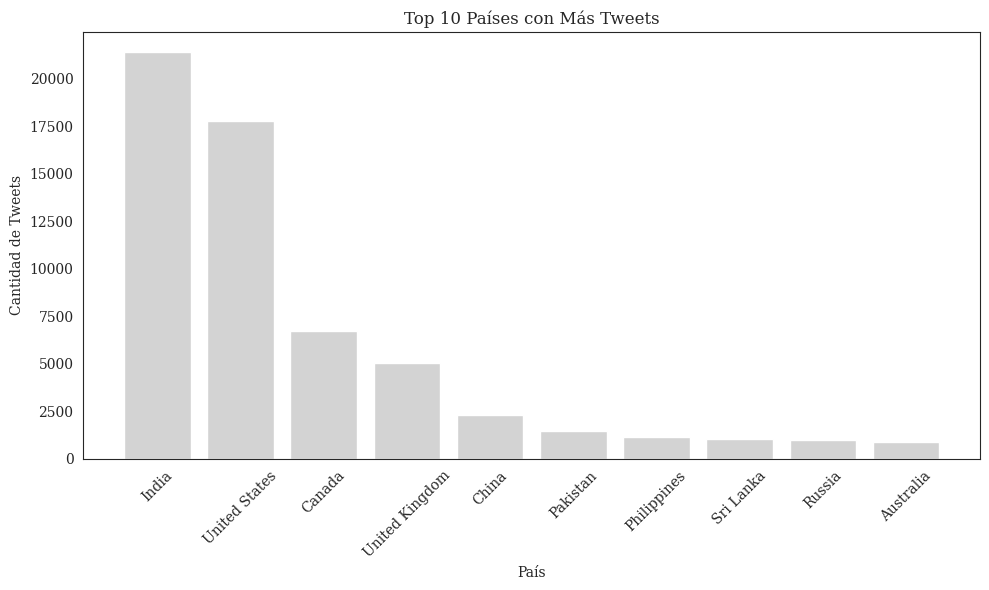

In [ ]:
import matplotlib.pyplot as plt

# Contar los tweets por país
tweets_por_pais = df['country_from_city'].value_counts().reset_index()
tweets_por_pais.columns = ['Pais', 'Cantidad_de_Tweets']

# Obtener los 10 países con más tweets
top_10_paises = tweets_por_pais.iloc[1:11]

plt.figure(figsize=(10, 6))
plt.bar(top_10_paises['Pais'], top_10_paises['Cantidad_de_Tweets'], color='lightgrey')
plt.xlabel('País')
plt.ylabel('Cantidad de Tweets')
plt.title('Top 10 Países con Más Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tratamiento de source
Podríamos tratarlo de dos maneras diferentes.

> Sustituir los 119 Nans, por el 'source' global más utilizado, que en este caso es 'Twitter for Android'

> Sustituir el Nan por la 'source' más utilizada por el usuario.
Es decir, mirar si ese usuario tiene más tweets con el campo 'source' completado, y sustituir el tweet que no lo tenga, por la 'source' que más utilice




In [ ]:
# Contamos cuantos tweets hay con cada 'Source'
conteo_sources = df['source'].value_counts()

print("Fuentes y su frecuencia en el dataset:")
for source, count in conteo_sources.items():
    print(f"{source}: {count} veces")

Fuentes y su frecuencia en el dataset:
Twitter for Android: 58722 veces
Twitter Web App: 57117 veces
Twitter for iPhone: 49479 veces
cowin_vaccine_app: 11670 veces
CowinAlertsBot: 11276 veces
Cowin Vaccination Availability: 8525 veces
TweetDeck: 7329 veces
VaxBlr: 6619 veces
Twitter for iPad: 3074 veces
Instagram: 2235 veces
Hootsuite Inc.: 1811 veces
Buffer: 945 veces
CowinAlertBot: 879 veces
Twitter Media Studio: 653 veces
Revive Social App: 547 veces
IFTTT: 470 veces
Hocalwire Social Share: 385 veces
histeriusapp: 368 veces
Twitter Media Studio - LiveCut: 340 veces
WordPress.com: 337 veces
Sprout Social: 333 veces
Blog2Social APP: 277 veces
LinkedIn: 214 veces
dlvr.it: 209 veces
SocialFlow: 170 veces
Twitter for Mac: 150 veces
Tickeron: 125 veces
IndiaPost: 124 veces
Zoho Social: 110 veces
Sprinklr: 109 veces
Twidere for Android: 108 veces
cowinslothelp: 105 veces
Tweetbot for iΟS: 103 veces
dose2: 94 veces
Etus Brasil: 90 veces
HubSpot: 84 veces
Tumblr: 78 veces
Sendible: 72 veces


In [ ]:
# Reemplazamos NaN en 'source' con la fuente más utilizada
df['source'] = df['source'].fillna('Twitter for Android')

 #Contamos cuantas veces se repite la source en todo el dataset
conteo_sources = df['source'].value_counts()

print("Fuentes y su frecuencia en el dataset después del reemplazo:")
for source, count in conteo_sources.items():
    print(f"{source}: {count} veces")

Fuentes y su frecuencia en el dataset después del reemplazo:
Twitter for Android: 58841 veces
Twitter Web App: 57117 veces
Twitter for iPhone: 49479 veces
cowin_vaccine_app: 11670 veces
CowinAlertsBot: 11276 veces
Cowin Vaccination Availability: 8525 veces
TweetDeck: 7329 veces
VaxBlr: 6619 veces
Twitter for iPad: 3074 veces
Instagram: 2235 veces
Hootsuite Inc.: 1811 veces
Buffer: 945 veces
CowinAlertBot: 879 veces
Twitter Media Studio: 653 veces
Revive Social App: 547 veces
IFTTT: 470 veces
Hocalwire Social Share: 385 veces
histeriusapp: 368 veces
Twitter Media Studio - LiveCut: 340 veces
WordPress.com: 337 veces
Sprout Social: 333 veces
Blog2Social APP: 277 veces
LinkedIn: 214 veces
dlvr.it: 209 veces
SocialFlow: 170 veces
Twitter for Mac: 150 veces
Tickeron: 125 veces
IndiaPost: 124 veces
Zoho Social: 110 veces
Sprinklr: 109 veces
Twidere for Android: 108 veces
cowinslothelp: 105 veces
Tweetbot for iΟS: 103 veces
dose2: 94 veces
Etus Brasil: 90 veces
HubSpot: 84 veces
Tumblr: 78 vec

In [ ]:
#datos nulos/missings
df.isna().sum()

id                        0
user_name                 0
user_location             0
user_description      17023
user_created              0
user_followers            0
user_friends              0
user_favourites           0
user_verified             0
date                      0
text                      0
hashtags              49701
source                    0
retweets                  0
favorites                 0
is_retweet                0
day_of_week               0
mes                       0
dia                       0
año                       0
date_only                 0
cleaned_location      60776
country_location     148810
city_location        154601
country_from_iso     227344
country_from_city         0
final_country             0
dtype: int64

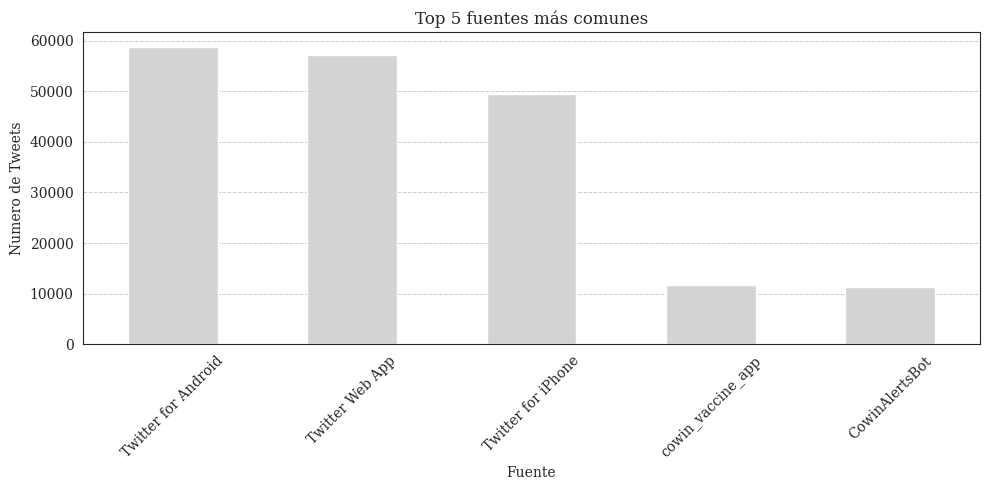

source
Twitter for Android    58841
Twitter Web App        57117
Twitter for iPhone     49479
cowin_vaccine_app      11670
CowinAlertsBot         11276
Name: count, dtype: int64

In [ ]:
# Identificar las 5 sources más comunes
top_sources = df['source'].value_counts().head(5)

# @title Fuentes más comunes
plt.figure(figsize=(10, 5))
top_sources.plot(kind='bar', color='lightgrey')
plt.title('Top 5 fuentes más comunes')
plt.xlabel('Fuente')
plt.ylabel('Numero de Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

top_sources

Entendemos que es normal no tener Hashtags y la descripción del usuario, por lo que no trataremos estos datos.

### Tratamiento de Hashtags

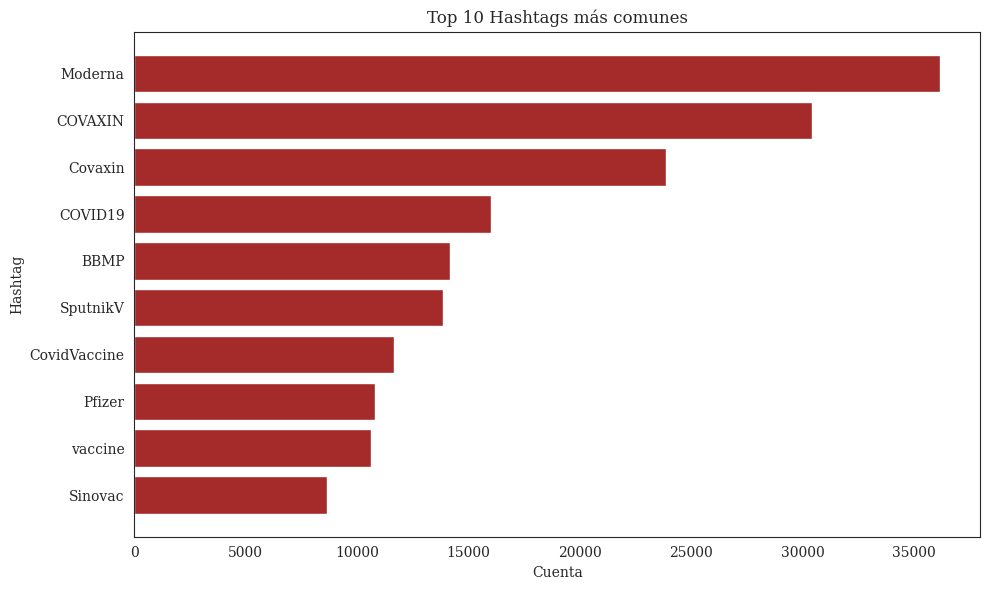

,Hashtag,Count
0,Moderna,36153
1,COVAXIN,30414
2,Covaxin,23874
3,COVID19,16020
4,BBMP,14182
5,SputnikV,13871
6,CovidVaccine,11663
7,Pfizer,10796
8,vaccine,10613
9,Sinovac,8637


In [ ]:
from collections import Counter
import ast

hashtags_list = df['hashtags'].dropna().apply(ast.literal_eval)
all_hashtags = [hashtag for sublist in hashtags_list for hashtag in sublist]
hashtags_count = Counter(all_hashtags)

# Obtener los 10 hashtags mas comunes
top_hashtags = hashtags_count.most_common(10)

top_hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

# @title Gráfico de los 10 hashtags más comunes
plt.figure(figsize=(10, 6))
plt.barh(top_hashtags_df['Hashtag'], top_hashtags_df['Count'], color='brown')
plt.title('Top 10 Hashtags más comunes')
plt.xlabel('Cuenta')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

top_hashtags_df

### Tratamiento de user_description

In [ ]:
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk import download
from wordcloud import WordCloud

# Descargar la lista de stopwords de NLTK para el análisis de texto
download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk import download

# Descargar la lista de stopwords de NLTK
download('stopwords')

# Stopwords en inglés de NLTK
stop_words = set(stopwords.words('english'))

# Función para limpiar y dividir el texto
def clean_and_split_text(text, stopwords_set):
    if not isinstance(text, str):
        return []  # Devuelve una lista vacía si el texto no es un string
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs y caracteres especiales
    text = re.sub(r'http\S+|@\S+|#\S+|[^\w\s]', '', text)
    # Dividir el texto en palabras y filtrar stopwords
    words = [word for word in text.split() if word not in stopwords_set]
    return words

# Generar bigramas/trigramas para la columna 'user_description'
all_bigrams = []
all_trigrams = []

for description in df['user_description'].dropna():  # Asegúrate de excluir valores NaN
    words = clean_and_split_text(description, stop_words)
    all_bigrams.extend(bigrams(words))
    all_trigrams.extend(trigrams(words))

# Contar la frecuencia de bigramas y trigramas
bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Stopwords en inglés de NLTK
stop_words = set(stopwords.words('english'))

# Extraer palabras de todos los tweets y contar su frecuencia
all_words = []
for text in df['user_description']:
    all_words.extend(clean_and_split_text(text, stop_words))

word_freq = Counter(all_words)

# Generar y visualizar la nube de palabras
wordcloud_user = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


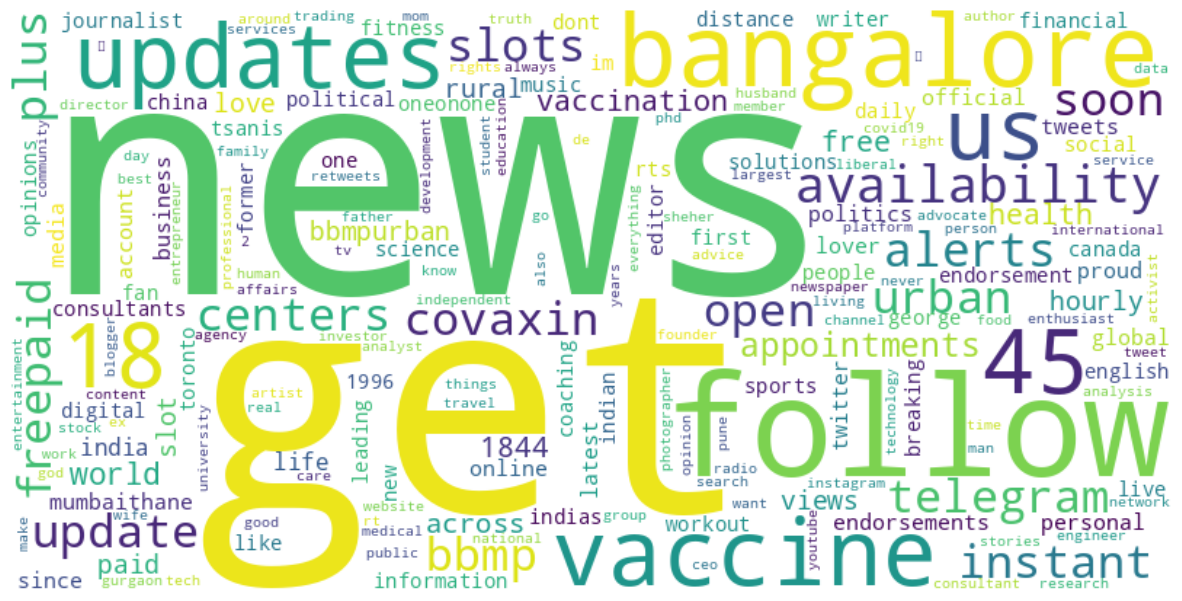

In [ ]:
# @title Gráfico de nube de palabras más usadas
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_user, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()

In [ ]:
# @title Los 10 bigramas más comunes
print("Bigramas más comunes:")
for bigram, freq in bigram_freq.most_common(10):
    print(f'{bigram}: {freq}')

Bigramas más comunes:
('follow', 'us'): 13177
('get', 'instant'): 12212
('instant', 'alerts'): 12210
('alerts', 'freepaid'): 12210
('freepaid', 'slots'): 12210
('slots', 'bbmp'): 12210
('bbmp', 'bangalore'): 12210
('bangalore', 'urban'): 12210
('urban', 'centers'): 12210
('us', 'get'): 11764


In [ ]:
# @title Los 10 trigramas más comunes
print("\nTrigramas más comunes:")
for trigram, freq in trigram_freq.most_common(10):
    print(f'{trigram}: {freq}')


Trigramas más comunes:
('get', 'instant', 'alerts'): 12210
('instant', 'alerts', 'freepaid'): 12210
('alerts', 'freepaid', 'slots'): 12210
('freepaid', 'slots', 'bbmp'): 12210
('slots', 'bbmp', 'bangalore'): 12210
('bbmp', 'bangalore', 'urban'): 12210
('bangalore', 'urban', 'centers'): 12210
('follow', 'us', 'get'): 11749
('us', 'get', 'update'): 11679
('get', 'update', 'soon'): 11679


### Tratamiento de text

In [ ]:
# Función para limpiar y extraer palabras de un texto
def clean_and_split_text(text, stopwords_set):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs, menciones de usuario y hashtags
    text = re.sub(r'http\S+|@\S+|#\S+', '', text)
    # Mantener solo las palabras
    text = re.sub(r'[^a-z\s]', '', text)
    # Dividir el texto en palabras y filtrar las stopwords
    words = [word for word in text.split() if word not in stopwords_set]
    return words

# Stopwords en inglés de NLTK
stop_words = set(stopwords.words('english'))

# Extraer palabras de todos los tweets y contar su frecuencia
all_words = []
for text in df['text']:
    all_words.extend(clean_and_split_text(text, stop_words))

word_freq = Counter(all_words)

# Generar y visualizar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

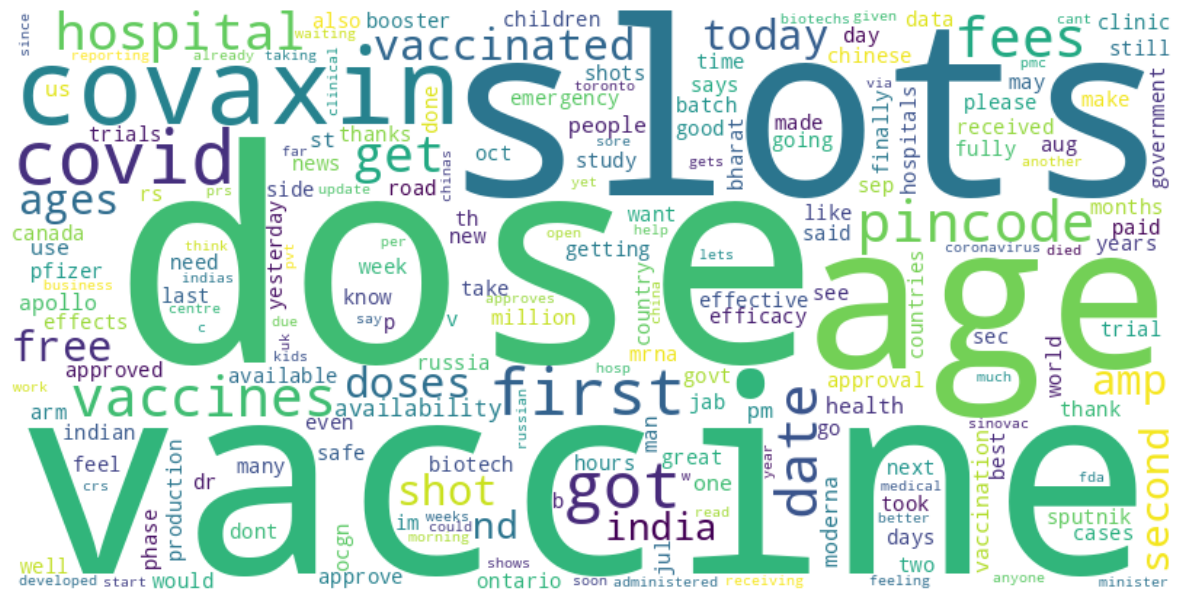

In [ ]:
# @title Gráfico de nube de palabras más usadas
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()

In [ ]:
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter

# Función para procesar el texto y generar bigramas/trigramas
def generate_ngrams(text, n):
    # Asumiendo que 'clean_and_split_text' es una función que limpia y divide el texto en palabras
    words = clean_and_split_text(text, stop_words)
    if n == 2:
        return list(bigrams(words))
    elif n == 3:
        return list(trigrams(words))
    else:
        return None

all_bigrams = []
for text in df['text']:
    all_bigrams.extend(generate_ngrams(text, 2))

bigram_freq = Counter(all_bigrams)

In [ ]:
# @title Los 10 bigramas más comunes
for bigram, freq in bigram_freq.most_common(10):
    print(f'{bigram}: {freq}')

('dose', 'slots'): 12589
('slots', 'age'): 12213
('age', 'slots'): 11500
('covaxin', 'dose'): 11408
('pincode', 'covaxin'): 11356
('age', 'ages'): 8816
('ages', 'date'): 8082
('covid', 'vaccine'): 7267
('slots', 'dose'): 7017
('free', 'slots'): 6981


In [ ]:
# @title Los 10 trigramas más comunes
all_trigrams = []
for text in df['text']:
    all_trigrams.extend(generate_ngrams(text, 3))

trigram_freq = Counter(all_trigrams)

for trigram, freq in trigram_freq.most_common(10):
    print(f'{trigram}: {freq}')

('dose', 'slots', 'age'): 12212
('covaxin', 'dose', 'slots'): 11357
('pincode', 'covaxin', 'dose'): 11356
('slots', 'age', 'ages'): 8816
('age', 'ages', 'date'): 8082
('free', 'slots', 'paid'): 4012
('slots', 'paid', 'slots'): 4012
('paid', 'slots', 'dose'): 4011
('date', 'sep', 'fees'): 3942
('availability', 'pm', 'free'): 3829


In [ ]:
# Guardar el conjunto de datos actualizado
df.to_csv("dataset_limpio.csv", index=False)